# Logistic Regression of Diabetes

Tutorial by **DataCamp** and dataset is from Kaggle
<a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database"> Indian Diabetes Database </a>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

The **objective of the dataset is to diagnostically predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./DATASETS/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Get basic info on dataframe

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

## 1. Select Features 

divide the columns into 2 types: 
- (y) dependent var (target)
- (X) independent var (feature variables)

In [6]:
# X features
df_ = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']]
# df['features'] = df['churn'].astype('int')
df_.head()

X =df_

# Y target
y = df.Outcome

## 2. Train/Test split

- ``train_test_split( features, target, test_set_size)``

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 9) (537,)
Test set: (231, 9) (231,)


## 3. Build Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)
# LR

LogisticRegression(C=0.01, solver='liblinear')

## 4. Predict

In [29]:
y_pred= LR.predict(X_test)

## 5. Evaluate

In [30]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#  T F
#  F T

array([[147,   5],
       [ 30,  49]])

In [32]:
from sklearn.metrics import jaccard_score
jac = np.round(jaccard_score(y_test, y_pred),3)*100
print(f'Jaccard scores the model accuracy: {jac}%')

Jaccard scores the model accuracy: 58.3%


Text(0.5, 257.44, 'Predicted label')

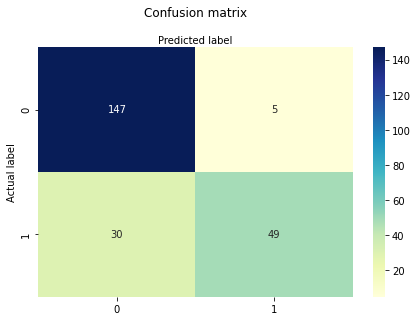

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred) *100 )
print("Precision:", metrics.precision_score(y_test, y_pred) *100)
print("Recall:", metrics.recall_score(y_test, y_pred) *100)

Accuracy: 84.84848484848484
Precision: 90.74074074074075
Recall: 62.0253164556962


## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

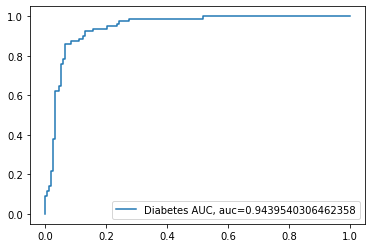

In [56]:
y_pred_prob = LR.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)

# auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr,tpr,label="Diabetes AUC, auc="+str(auc))
plt.legend(loc=4)
plt.show()